In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import time
from sklearn.decomposition import PCA, FastICA
from sklearn.random_projection import GaussianRandomProjection
from scipy.stats import kurtosis
from sklearn.metrics import mean_squared_error

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve

1. Data Processing 

In [2]:
hospital = pd.read_csv('medical.csv')
hospital['SEX'] = hospital['SEX'].replace({'F':0,'M':1})
hospital['SOURCE'] = hospital['SOURCE'].replace({'in':0,'out':1})
y_hospital = hospital['SOURCE']
X_hospital = hospital.drop('SOURCE',axis = 1)
# X_train_hospital, X_test_hospital, y_train_hospital, y_test_hospital = train_test_split(
#     hospital_x, hospital_y, test_size = 0.20)

iris = pd.read_csv('iris.csv')
le = LabelEncoder()
iris['Species'] = le.fit_transform(iris['Species'])

y_iris = iris['Species'].values
X_iris = iris.drop(['Species', 'Id'],axis = 1).values
# X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(
#     iris_x, iris_y, test_size = 0.20, random_state = 0)

In [3]:
def evaluate_clustering(X, y, algorithm, n_clusters):
    if algorithm == 'kmeans':
        model = KMeans(n_clusters=n_clusters, random_state=42)
    elif algorithm == 'em':
        model = GaussianMixture(n_components=n_clusters, random_state=42)
    else:
        raise ValueError("Algorithm must be 'kmeans' or 'em'")
    start_time = time.time()
    model.fit(X)
    if algorithm == 'kmeans':
        labels = model.labels_
    else:
        labels = model.predict(X)
    end_time = time.time()
    rand_index = adjusted_rand_score(y, labels)
    silhouette = silhouette_score(X, labels)
    duration = end_time - start_time
    
    return rand_index, silhouette, duration

2. clustering

/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will chang

rand_index_km_iris 0.7302382722834697
rand_index_em_iris 0.9038742317748124


/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will chang

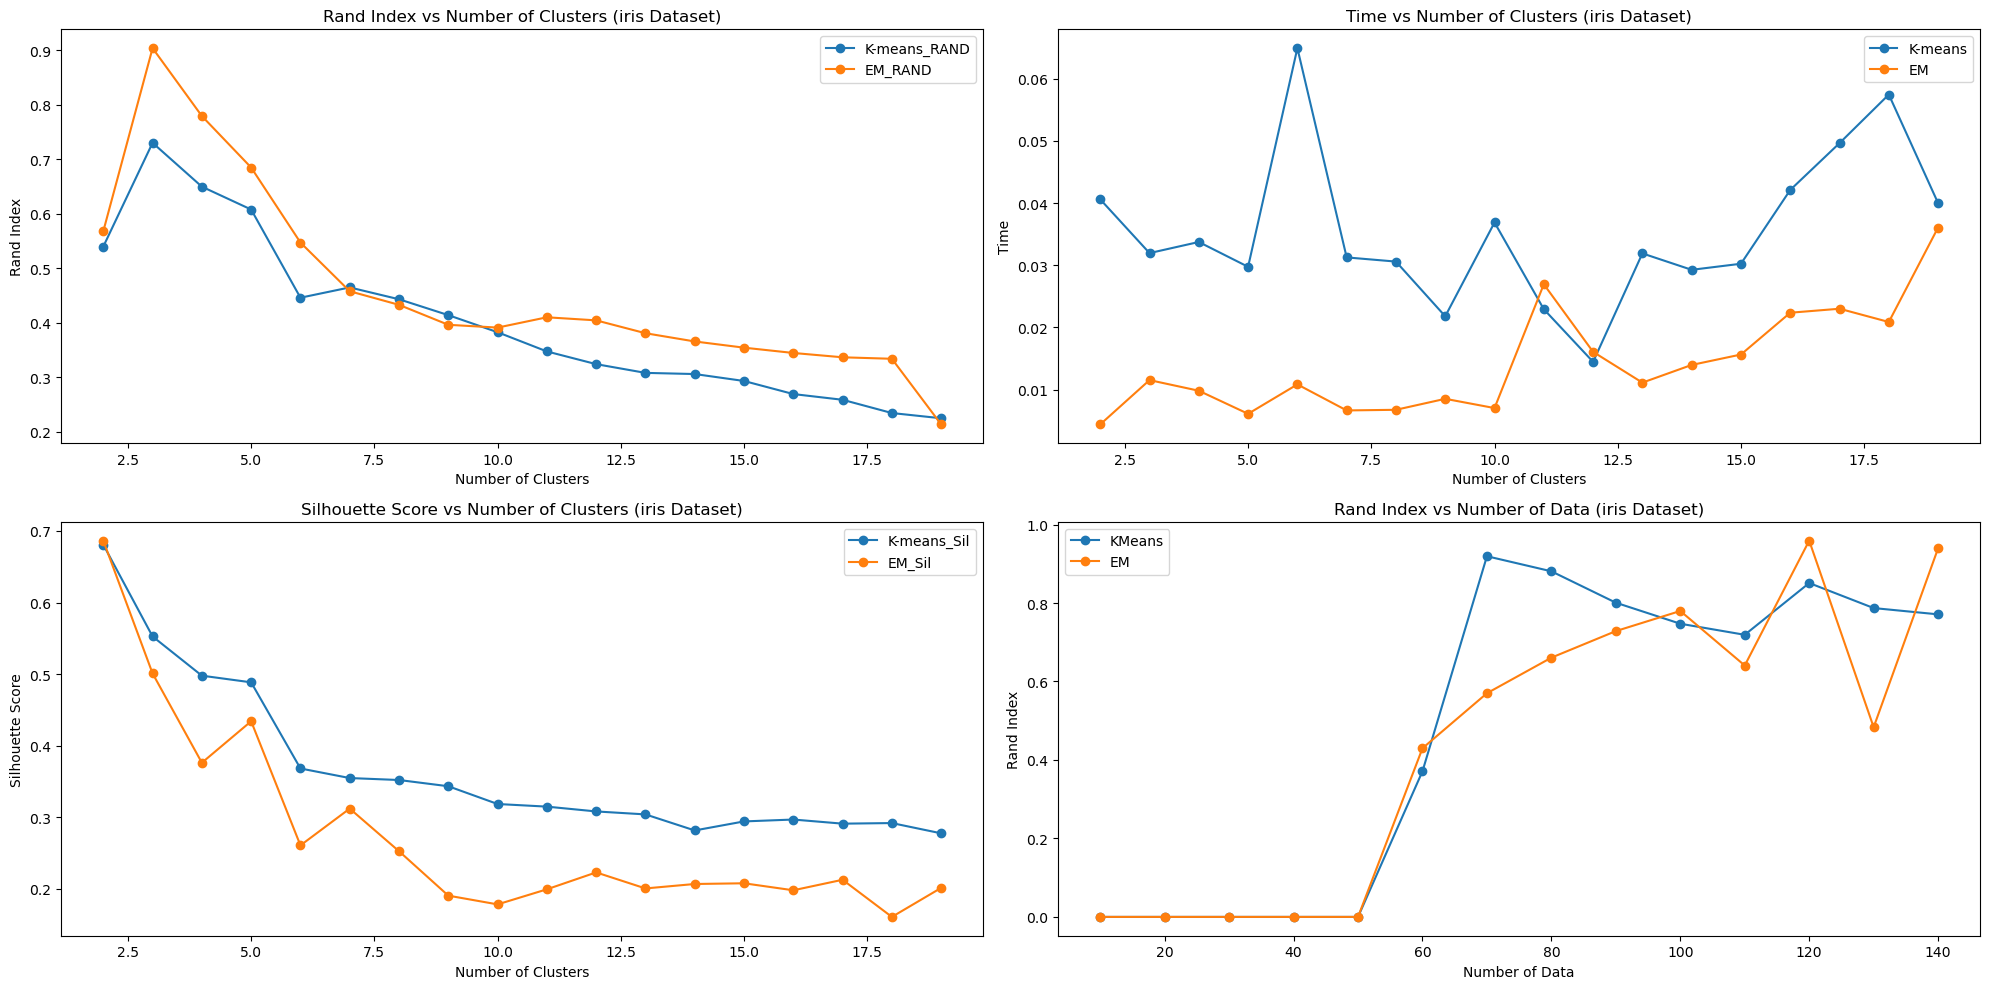

In [4]:
def iris_performance(X_iris, y_iris):
    rand_iris_kmeanss = []
    rand_iris_ems = []
    silhouette_iris_ems = []
    silhouette_iris_kms = []
    # Evaluate on iris dataset
    km_t_results = []
    em_t_results = []
    for i in range(2, 20):
        rand_index_km_iris, silhouette_iris_km, km_t = evaluate_clustering(X_iris, y_iris, 'kmeans', i)
        rand_iris_kmeanss.append(rand_index_km_iris)
        silhouette_iris_kms.append(silhouette_iris_km)
        km_t_results.append(km_t)
        

        rand_index_em_iris, silhouette_iris_em, em_t = evaluate_clustering(X_iris, y_iris, 'em', i)
        rand_iris_ems.append(rand_index_em_iris)
        silhouette_iris_ems.append(silhouette_iris_em)
        
        
            
        em_t_results.append(em_t)
    # Plot results
    
    print('rand_index_km_iris', max(rand_iris_kmeanss))
    print('rand_index_em_iris', max(rand_iris_ems))

    fig, axes = plt.subplots(2, 2, figsize=(20, 10))
    axes[0][0].plot(range(2, 20), rand_iris_kmeanss, label='K-means_RAND', marker='o')
    axes[0][0].plot(range(2, 20), rand_iris_ems, label='EM_RAND', marker='o')
    axes[0][0].set_title('Rand Index vs Number of Clusters (iris Dataset)')
    axes[0][0].set_xlabel('Number of Clusters')
    axes[0][0].set_ylabel('Rand Index')
    axes[0][0].legend()

    axes[1][0].plot(range(2, 20), silhouette_iris_kms, label='K-means_Sil', marker='o')
    axes[1][0].plot(range(2, 20), silhouette_iris_ems, label='EM_Sil', marker='o')
    axes[1][0].set_title('Silhouette Score vs Number of Clusters (iris Dataset)')
    axes[1][0].set_xlabel('Number of Clusters')
    axes[1][0].set_ylabel('Silhouette Score')
    axes[1][0].legend()

    axes[0][1].plot(range(2, 20), km_t_results, label='K-means', marker='o')
    axes[0][1].plot(range(2, 20), em_t_results, label='EM', marker='o')
    axes[0][1].set_title('Time vs Number of Clusters (iris Dataset)')
    axes[0][1].set_xlabel('Number of Clusters')
    axes[0][1].set_ylabel('Time')
    axes[0][1].legend()

    rand_index_kmeans_iris_results = []
    rand_index_em_iris_results = []

    for index in range(10, len(X_iris), 10):
        rand_index_kmeans_iris, silhouette_iris_km, _ = evaluate_clustering(X_iris[:index],
                                                                                    y_iris[:index], 'kmeans', 3)
        rand_index_em_iris, silhouette_iris_em, _ = evaluate_clustering(X_iris[:index], y_iris[:index],
                                                                                'em', 3)

        rand_index_kmeans_iris_results.append(rand_index_kmeans_iris)
        rand_index_em_iris_results.append(rand_index_em_iris)

    axes[1][1].plot(range(10, len(X_iris), 10), rand_index_kmeans_iris_results, label='KMeans', marker='o')
    axes[1][1].plot(range(10, len(X_iris), 10), rand_index_em_iris_results, label='EM', marker='o')
    axes[1][1].set_title('Rand Index vs Number of Data (iris Dataset)')
    axes[1][1].set_xlabel('Number of Data')
    axes[1][1].set_ylabel('Rand Index')
    axes[1][1].legend()
    return axes


iris_performance(X_iris, y_iris)

plt.tight_layout()
plt.show()


/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will chang

rand_index_km_hospital 0.0774972456628461
rand_index_em_hospital 0.045020839614506945


/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will chang

/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will chang

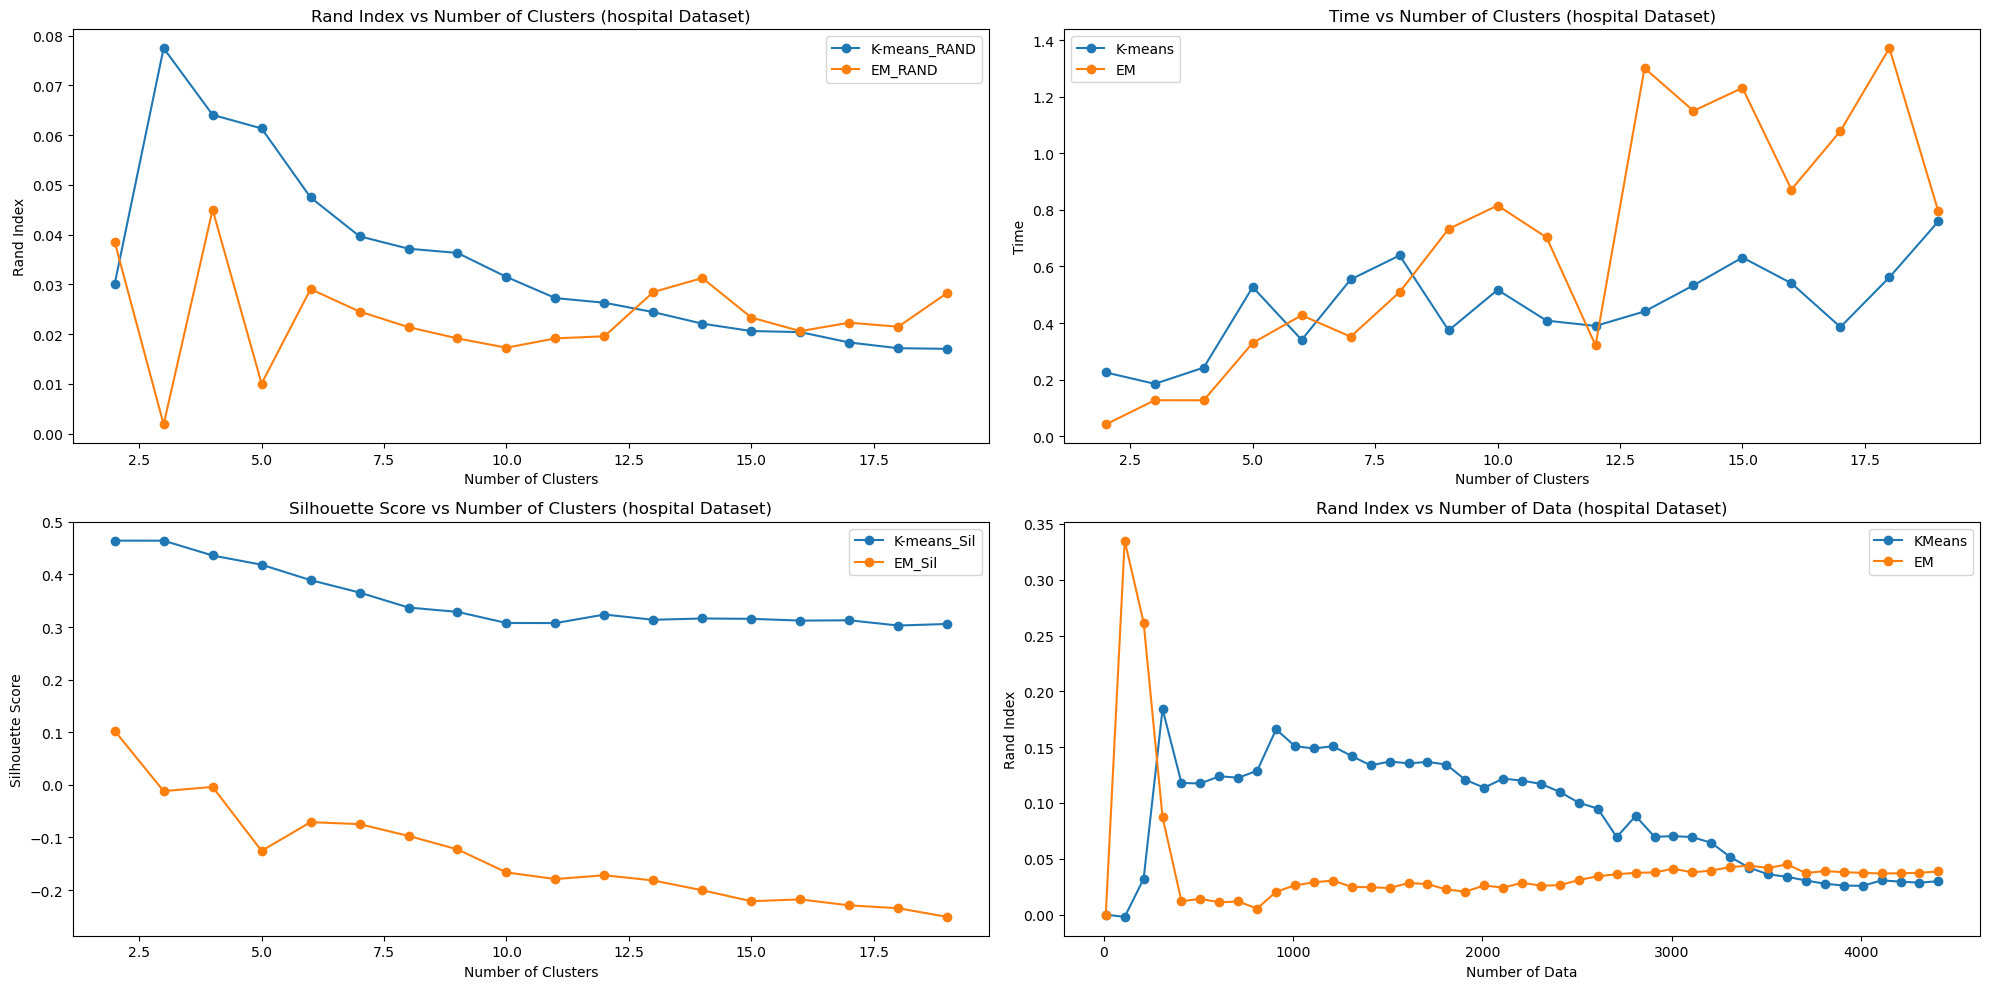

In [5]:
def hospital_performance(X_hospital, y_hospital):
    rand_hospital_kmeanss = []
    rand_hospital_ems = []
    silhouette_hospital_ems = []
    silhouette_hospital_kms = []
    # Evaluate on hospital dataset
    km_t_results = []
    em_t_results = []
    for i in range(2,20):
        rand_index_km_hospital, silhouette_hospital_km, km_t = evaluate_clustering(X_hospital, y_hospital, 'kmeans', i)
        rand_hospital_kmeanss.append(rand_index_km_hospital)
        silhouette_hospital_kms.append(silhouette_hospital_km)
        km_t_results.append(km_t)

        rand_index_em_hospital, silhouette_hospital_em, em_t = evaluate_clustering(X_hospital, y_hospital, 'em', i)
        rand_hospital_ems.append(rand_index_em_hospital)
        silhouette_hospital_ems.append(silhouette_hospital_em)
        em_t_results.append(em_t)
    print('rand_index_km_hospital', max(rand_hospital_kmeanss))
    print('rand_index_em_hospital', max(rand_hospital_ems))

    # Plot results
    
    fig, axes = plt.subplots(2, 2, figsize=(20, 10))
    axes[0][0].plot(range(2,20), rand_hospital_kmeanss, label='K-means_RAND', marker='o')
    axes[0][0].plot(range(2,20), rand_hospital_ems, label='EM_RAND', marker='o')
    axes[0][0].set_title('Rand Index vs Number of Clusters (hospital Dataset)')
    axes[0][0].set_xlabel('Number of Clusters')
    axes[0][0].set_ylabel('Rand Index')
    axes[0][0].legend()

    axes[1][0].plot(range(2,20), silhouette_hospital_kms, label='K-means_Sil', marker='o')
    axes[1][0].plot(range(2,20), silhouette_hospital_ems, label='EM_Sil', marker='o')
    axes[1][0].set_title('Silhouette Score vs Number of Clusters (hospital Dataset)')
    axes[1][0].set_xlabel('Number of Clusters')
    axes[1][0].set_ylabel('Silhouette Score')
    axes[1][0].legend()

    axes[0][1].plot(range(2,20), km_t_results, label='K-means', marker='o')
    axes[0][1].plot(range(2,20), em_t_results, label='EM', marker='o')
    axes[0][1].set_title('Time vs Number of Clusters (hospital Dataset)')
    axes[0][1].set_xlabel('Number of Clusters')
    axes[0][1].set_ylabel('Time')
    axes[0][1].legend()

    rand_index_kmeans_hospital_results = []
    silhouette_hospital_km_results = []

    rand_index_em_hospital_results = []
    silhouette_hospital_em_results = []

    for index in range(10, len(X_hospital), 100):
        rand_index_kmeans_hospital, silhouette_hospital_km, _ = evaluate_clustering(X_hospital[:index], y_hospital[:index], 'kmeans', 2)
        rand_index_em_hospital, silhouette_hospital_em, _ = evaluate_clustering(X_hospital[:index], y_hospital[:index], 'em', 2)

        rand_index_kmeans_hospital_results.append(rand_index_kmeans_hospital)
        silhouette_hospital_km_results.append(silhouette_hospital_km)
        rand_index_em_hospital_results.append(rand_index_em_hospital)
        silhouette_hospital_em_results.append(silhouette_hospital_em)

    axes[1][1].plot(range(10, len(X_hospital), 100), rand_index_kmeans_hospital_results, label='KMeans', marker='o')
    axes[1][1].plot(range(10, len(X_hospital), 100), rand_index_em_hospital_results, label='EM', marker='o')
    axes[1][1].set_title('Rand Index vs Number of Data (hospital Dataset)')
    axes[1][1].set_xlabel('Number of Data')
    axes[1][1].set_ylabel('Rand Index')
    axes[1][1].legend()
    return axes
hospital_performance(X_hospital, y_hospital)

plt.tight_layout()
plt.show()


3. dimension reduct

Number of PCA components to retain 95% variance: 2


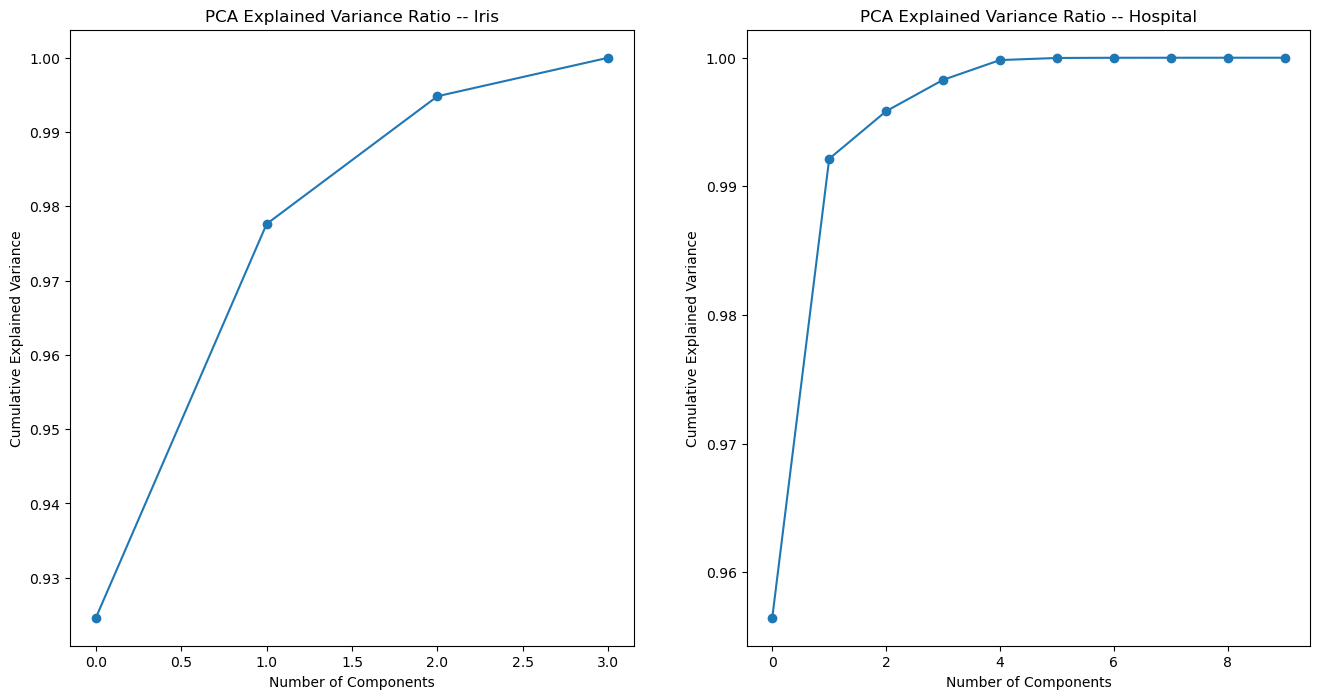

Number of PCA components to retain 95% variance: 1


In [6]:
### PCA: Explained Variance

fig, axes = plt.subplots(1, 2, figsize=(16, 8))
pca = PCA()
X_iris_pca = pca.fit_transform(X_iris)
explained_variance = pca.explained_variance_ratio_
# Choose number of components that explain at least 95% of the variance
n_components_pca = np.argmax(np.cumsum(explained_variance) >= 0.95) + 1
print(f"Number of PCA components to retain 95% variance: {n_components_pca}")


# Plot explained variance ratio

axes[0].plot(np.cumsum(explained_variance), marker='o')
axes[0].set_xlabel('Number of Components')
axes[0].set_ylabel('Cumulative Explained Variance')
axes[0].set_title('PCA Explained Variance Ratio -- Iris')

pca = PCA()
X_hospital_pca = pca.fit_transform(X_hospital)
explained_variance = pca.explained_variance_ratio_

# Plot explained variance ratio
axes[1].plot(np.cumsum(explained_variance), marker='o')
axes[1].set_xlabel('Number of Components')
axes[1].set_ylabel('Cumulative Explained Variance')
axes[1].set_title('PCA Explained Variance Ratio -- Hospital')
plt.show()

# Choose number of components that explain at least 95% of the variance
n_components_pca = np.argmax(np.cumsum(explained_variance) >= 0.95) + 1
print(f"Number of PCA components to retain 95% variance: {n_components_pca}")


Number of ICA components that maximizes kurtosis: 1


/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


Number of ICA components that maximizes kurtosis: 8


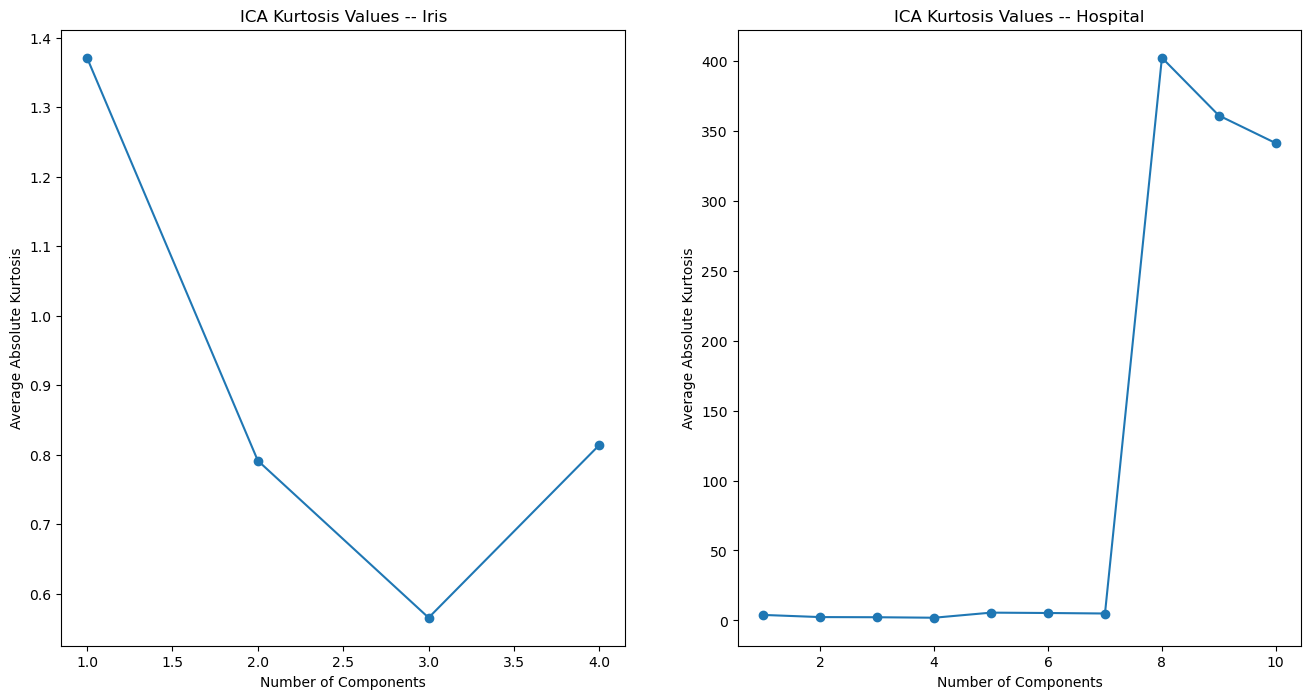

In [7]:
### ICA: Kurtosis

fig, axes = plt.subplots(1, 2, figsize=(16, 8))
max_components = X_iris.shape[1]
kurtosis_values = []

for n_components in range(1, max_components + 1):
    ica = FastICA(n_components=n_components, random_state=42)
    X_iris_ica = ica.fit_transform(X_iris)
    kurt = kurtosis(X_iris_ica)
    kurtosis_values.append(np.mean(np.abs(kurt)))

# Plot kurtosis values
axes[0].plot(range(1, max_components + 1), kurtosis_values, marker='o')
axes[0].set_xlabel('Number of Components')
axes[0].set_ylabel('Average Absolute Kurtosis')
axes[0].set_title('ICA Kurtosis Values -- Iris')

# Choose number of components that maximizes kurtosis
n_components_ica = np.argmax(kurtosis_values) + 1
print(f"Number of ICA components that maximizes kurtosis: {n_components_ica}")




### ICA: Kurtosis
max_components = X_hospital.shape[1]
kurtosis_values = []

for n_components in range(1, max_components + 1):
    ica = FastICA(n_components=n_components, random_state=42)
    X_hospital_ica = ica.fit_transform(X_hospital)
    kurt = kurtosis(X_hospital_ica)
    kurtosis_values.append(np.mean(np.abs(kurt)))

# Plot kurtosis values
axes[1].plot(range(1, max_components + 1), kurtosis_values, marker='o')
axes[1].set_xlabel('Number of Components')
axes[1].set_ylabel('Average Absolute Kurtosis')
axes[1].set_title('ICA Kurtosis Values -- Hospital')
plt.plot()
# Choose number of components that maximizes kurtosis
n_components_ica = np.argmax(kurtosis_values) + 1
print(f"Number of ICA components that maximizes kurtosis: {n_components_ica}")



Number of RP components that minimizes reconstruction error: 10


/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/random_projection.py:408: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (4 < 5).The dimensionality of the problem will not be reduced.
  warnings.warn(
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/random_projection.py:408: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (4 < 6).The dimensionality of the problem will not be reduced.
  warnings.warn(
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/random_projection.py:408: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (4 < 7).The dimensionality of the problem will not be reduced.
  warnings.warn(
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/random_projection.py:408: DataDimensionalityWarning: The number of components is hi

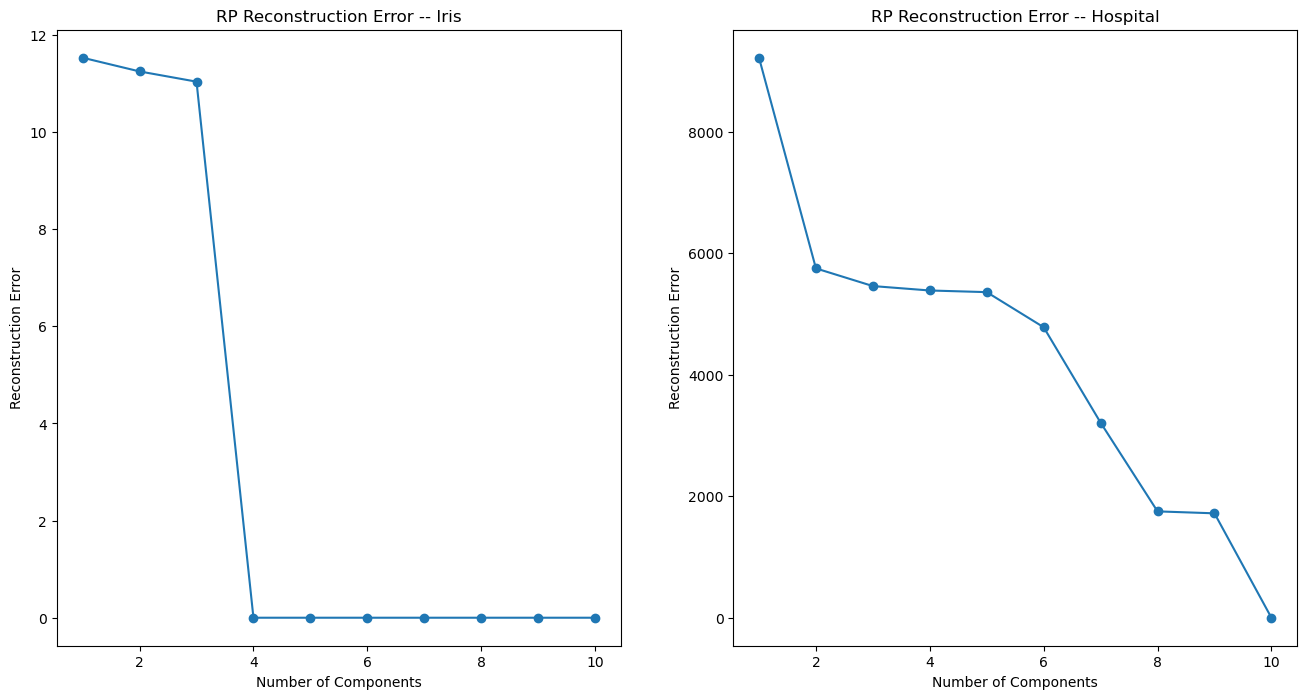

Number of RP components that minimizes reconstruction error: 10


In [8]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

### RP: Reconstruction Error
reconstruction_errors = []

for n_components in range(1, max_components + 1):
    rp = GaussianRandomProjection(n_components=n_components, random_state=42)
    X_iris_rp = rp.fit_transform(X_iris)
    X_rp_reconstructed = np.linalg.pinv(rp.components_.T @ rp.components_) @ rp.components_.T @ X_iris_rp.T
    reconstruction_error = mean_squared_error(X_iris, X_rp_reconstructed.T)
    reconstruction_errors.append(reconstruction_error)

# Plot reconstruction errors
axes[0].plot(range(1, max_components + 1), reconstruction_errors, marker='o')
axes[0].set_xlabel('Number of Components')
axes[0].set_ylabel('Reconstruction Error')
axes[0].set_title('RP Reconstruction Error -- Iris')

# Choose number of components that minimizes reconstruction error
n_components_rp = np.argmin(reconstruction_errors) + 1
print(f"Number of RP components that minimizes reconstruction error: {n_components_rp}")


### RP: Reconstruction Error
reconstruction_errors = []

for n_components in range(1, max_components + 1):
    rp = GaussianRandomProjection(n_components=n_components, random_state=42)
    X_hospital_rp = rp.fit_transform(X_hospital)
    X_rp_reconstructed = np.linalg.pinv(rp.components_.T @ rp.components_) @ rp.components_.T @ X_hospital_rp.T
    reconstruction_error = mean_squared_error(X_hospital, X_rp_reconstructed.T)
    reconstruction_errors.append(reconstruction_error)

# Plot reconstruction errors
axes[1].plot(range(1, max_components + 1), reconstruction_errors, marker='o')
axes[1].set_xlabel('Number of Components')
axes[1].set_ylabel('Reconstruction Error')
axes[1].set_title('RP Reconstruction Error -- Hospital')
plt.show()

# Choose number of components that minimizes reconstruction error
n_components_rp = np.argmin(reconstruction_errors) + 1
print(f"Number of RP components that minimizes reconstruction error: {n_components_rp}")




4. clustering on Dimension Reduced dataset 

In [9]:

# Define the number of components based on previous evaluations
n_components_pca = 2  # Example: from PCA explained variance plot
n_components_ica = 1  # Example: from ICA kurtosis plot
n_components_rp = 4   # Example: from RP reconstruction error plot

# Apply PCA
pca = PCA(n_components=n_components_pca)
X_iris_pca = pca.fit_transform(X_iris)

# Apply ICA
ica = FastICA(n_components=n_components_ica, random_state=42)
X_iris_ica = ica.fit_transform(X_iris)

# Apply RP
rp = GaussianRandomProjection(n_components=n_components_rp, random_state=42)
X_iris_rp = rp.fit_transform(X_iris)


/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will chang

rand_index_km_iris 0.7163421126838476
rand_index_em_iris 0.9410449800736683


/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will chang

array([[<Axes: title={'center': 'Rand Index vs Number of Clusters (iris Dataset)'}, xlabel='Number of Clusters', ylabel='Rand Index'>,
        <Axes: title={'center': 'Time vs Number of Clusters (iris Dataset)'}, xlabel='Number of Clusters', ylabel='Time'>],
       [<Axes: title={'center': 'Silhouette Score vs Number of Clusters (iris Dataset)'}, xlabel='Number of Clusters', ylabel='Silhouette Score'>,
        <Axes: title={'center': 'Rand Index vs Number of Data (iris Dataset)'}, xlabel='Number of Data', ylabel='Rand Index'>]],
      dtype=object)

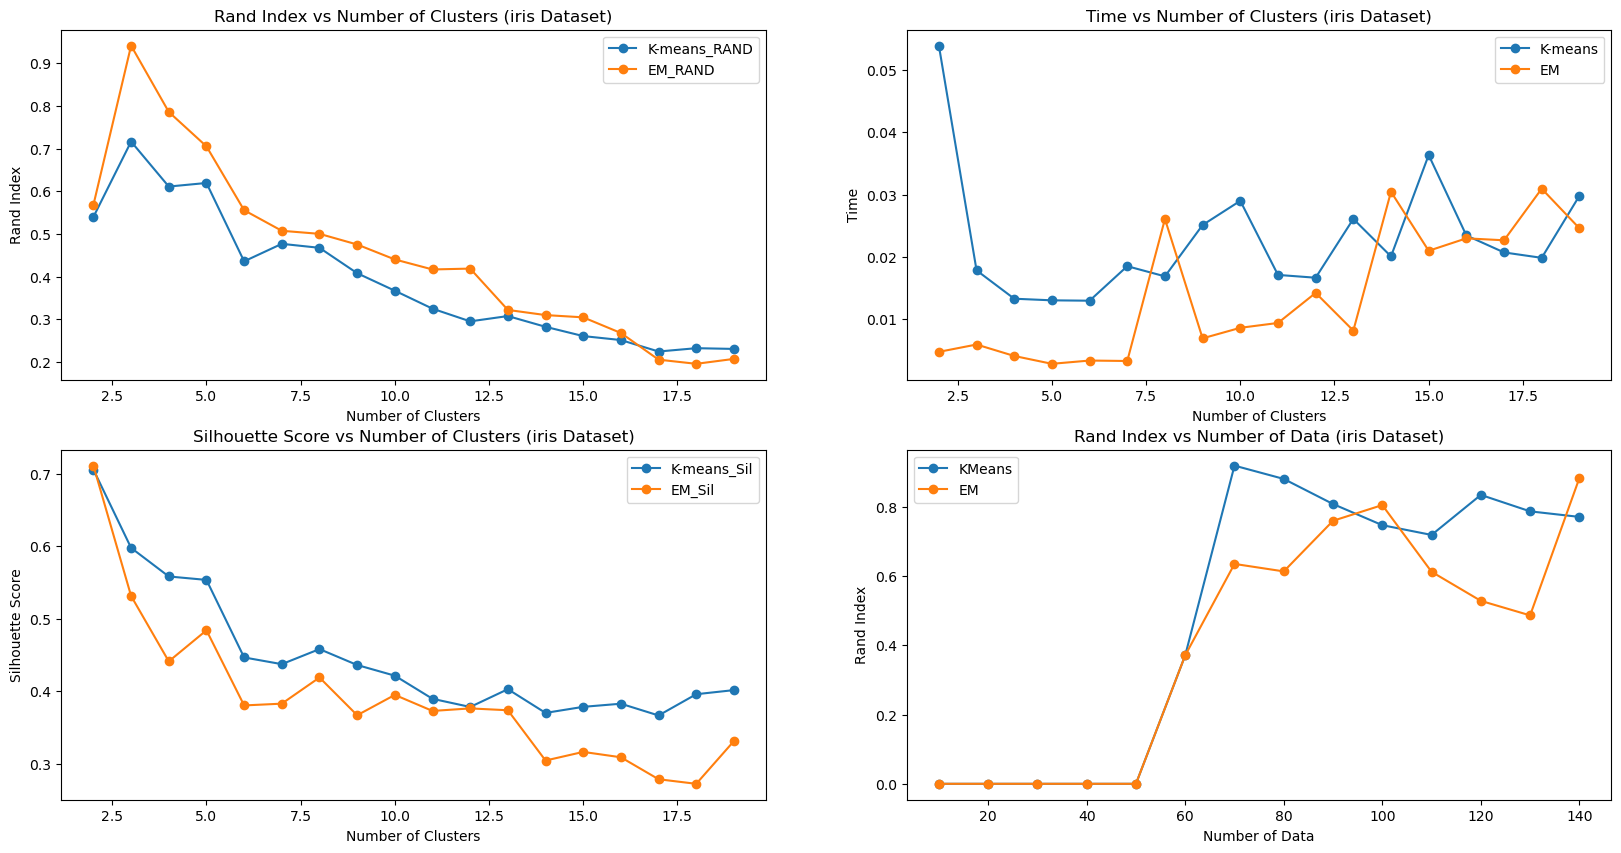

In [10]:
iris_performance(X_iris_pca, y_iris)

/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will chang

rand_index_km_iris 0.7726314170414115
rand_index_em_iris 0.7455038681804481


/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will chang

array([[<Axes: title={'center': 'Rand Index vs Number of Clusters (iris Dataset)'}, xlabel='Number of Clusters', ylabel='Rand Index'>,
        <Axes: title={'center': 'Time vs Number of Clusters (iris Dataset)'}, xlabel='Number of Clusters', ylabel='Time'>],
       [<Axes: title={'center': 'Silhouette Score vs Number of Clusters (iris Dataset)'}, xlabel='Number of Clusters', ylabel='Silhouette Score'>,
        <Axes: title={'center': 'Rand Index vs Number of Data (iris Dataset)'}, xlabel='Number of Data', ylabel='Rand Index'>]],
      dtype=object)

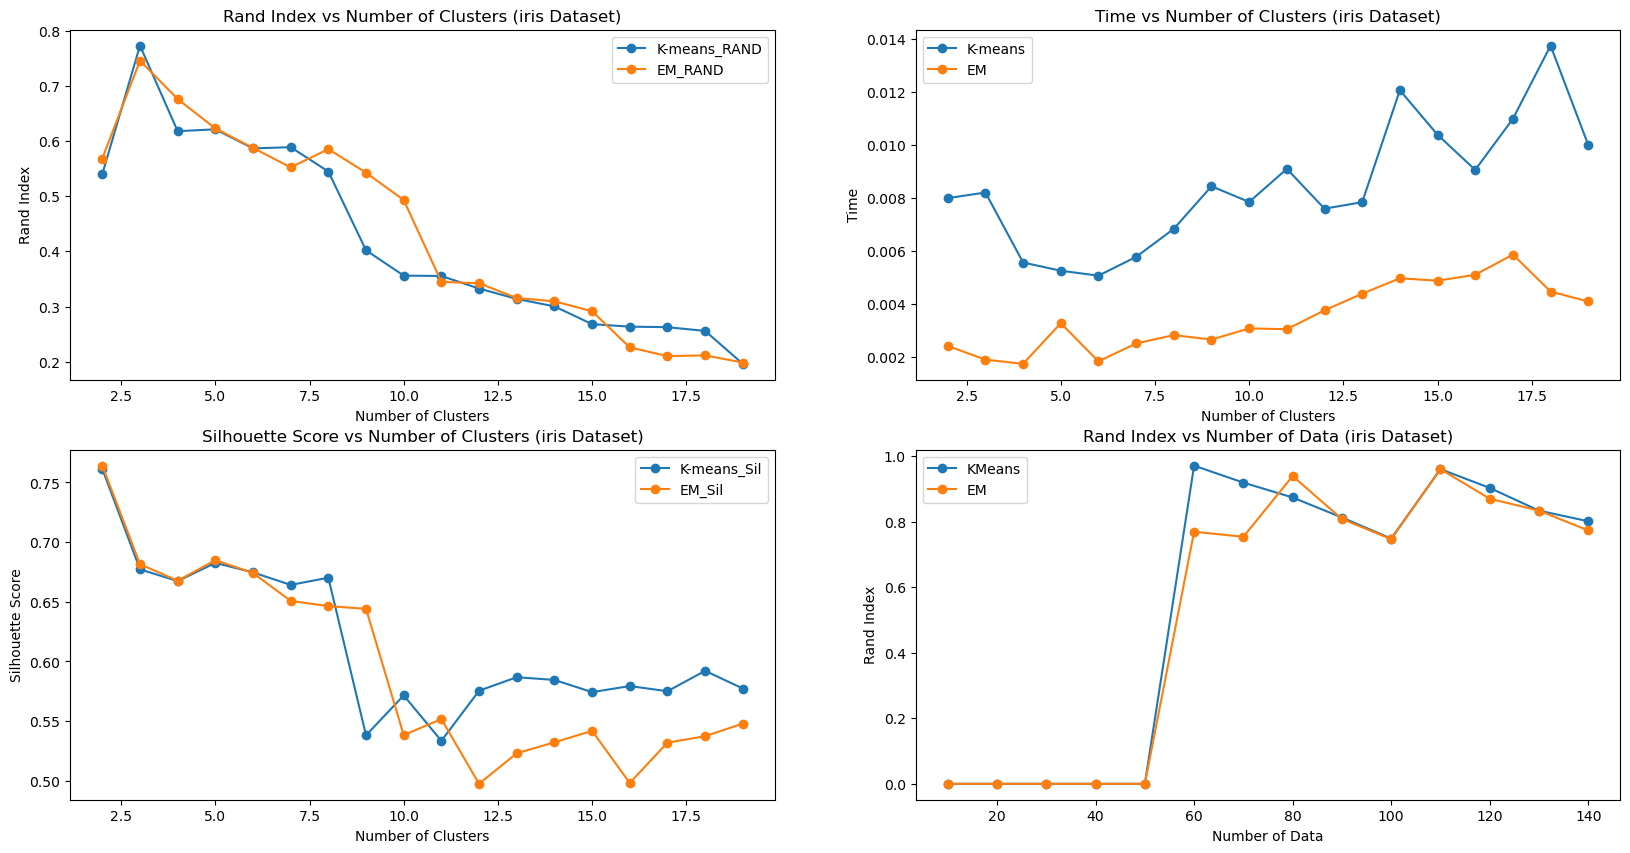

In [11]:
iris_performance(X_iris_ica, y_iris)

/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will chang

rand_index_km_iris 0.8188082691528172
rand_index_em_iris 0.9038742317748124


/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will chang

array([[<Axes: title={'center': 'Rand Index vs Number of Clusters (iris Dataset)'}, xlabel='Number of Clusters', ylabel='Rand Index'>,
        <Axes: title={'center': 'Time vs Number of Clusters (iris Dataset)'}, xlabel='Number of Clusters', ylabel='Time'>],
       [<Axes: title={'center': 'Silhouette Score vs Number of Clusters (iris Dataset)'}, xlabel='Number of Clusters', ylabel='Silhouette Score'>,
        <Axes: title={'center': 'Rand Index vs Number of Data (iris Dataset)'}, xlabel='Number of Data', ylabel='Rand Index'>]],
      dtype=object)

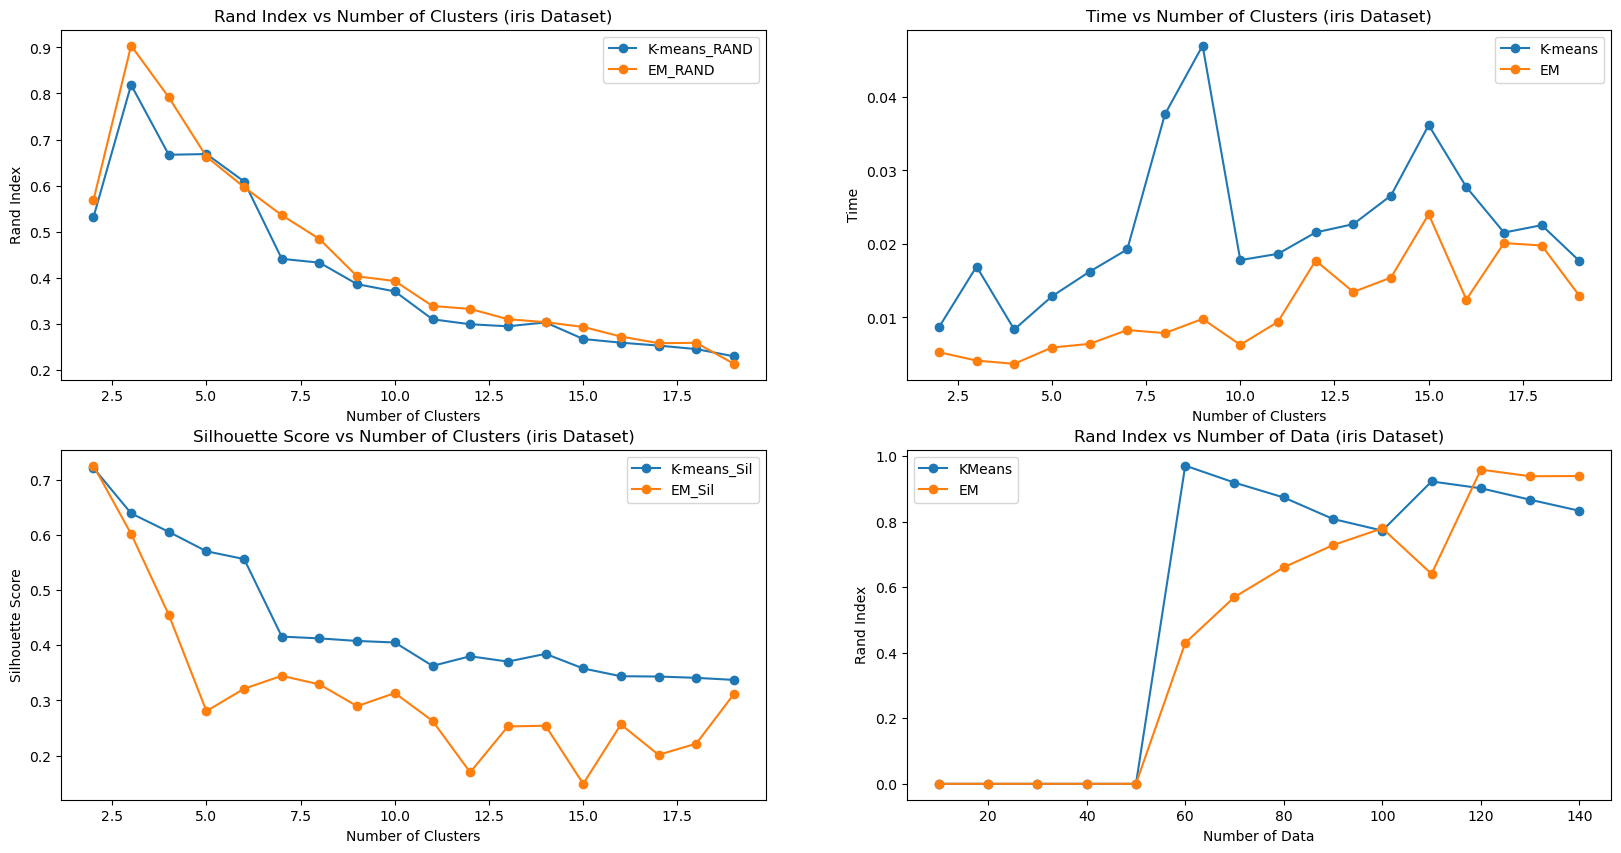

In [12]:
iris_performance(X_iris_rp, y_iris)

In [13]:



# Define the number of components based on previous evaluations
n_components_pca = 1  # Example: from PCA explained variance plot
n_components_ica = 8  # Example: from ICA kurtosis plot
n_components_rp = 10   # Example: from RP reconstruction error plot

# Apply PCA
pca = PCA(n_components=n_components_pca)
X_hospital_pca = pca.fit_transform(X_hospital)

# Apply ICA
ica = FastICA(n_components=n_components_ica, random_state=42)
X_hospital_ica = ica.fit_transform(X_hospital)

# Apply RP
rp = GaussianRandomProjection(n_components=n_components_rp, random_state=42)
X_hospital_rp = rp.fit_transform(X_hospital)


/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will chang

rand_index_km_hospital 0.07803997725803412
rand_index_em_hospital 0.11528867092163186


/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will chang

/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will chang

array([[<Axes: title={'center': 'Rand Index vs Number of Clusters (hospital Dataset)'}, xlabel='Number of Clusters', ylabel='Rand Index'>,
        <Axes: title={'center': 'Time vs Number of Clusters (hospital Dataset)'}, xlabel='Number of Clusters', ylabel='Time'>],
       [<Axes: title={'center': 'Silhouette Score vs Number of Clusters (hospital Dataset)'}, xlabel='Number of Clusters', ylabel='Silhouette Score'>,
        <Axes: title={'center': 'Rand Index vs Number of Data (hospital Dataset)'}, xlabel='Number of Data', ylabel='Rand Index'>]],
      dtype=object)

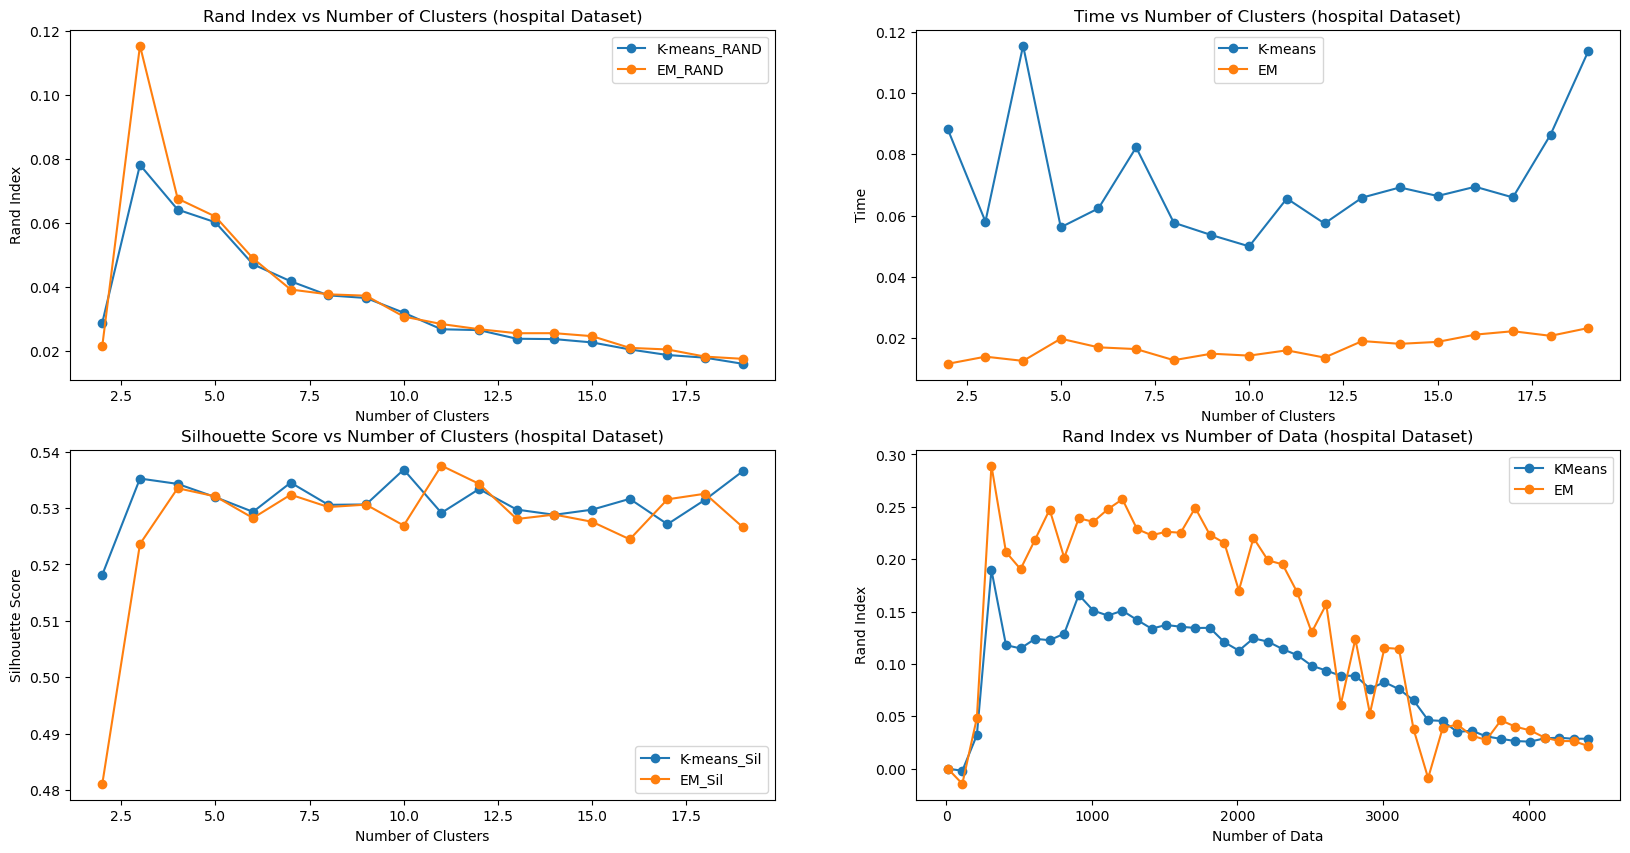

In [14]:
hospital_performance(X_hospital_pca, y_hospital)

/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will chang

rand_index_km_hospital 0.040877039377583406
rand_index_em_hospital 0.04909097774417327


/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will chang

/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will chang

array([[<Axes: title={'center': 'Rand Index vs Number of Clusters (hospital Dataset)'}, xlabel='Number of Clusters', ylabel='Rand Index'>,
        <Axes: title={'center': 'Time vs Number of Clusters (hospital Dataset)'}, xlabel='Number of Clusters', ylabel='Time'>],
       [<Axes: title={'center': 'Silhouette Score vs Number of Clusters (hospital Dataset)'}, xlabel='Number of Clusters', ylabel='Silhouette Score'>,
        <Axes: title={'center': 'Rand Index vs Number of Data (hospital Dataset)'}, xlabel='Number of Data', ylabel='Rand Index'>]],
      dtype=object)

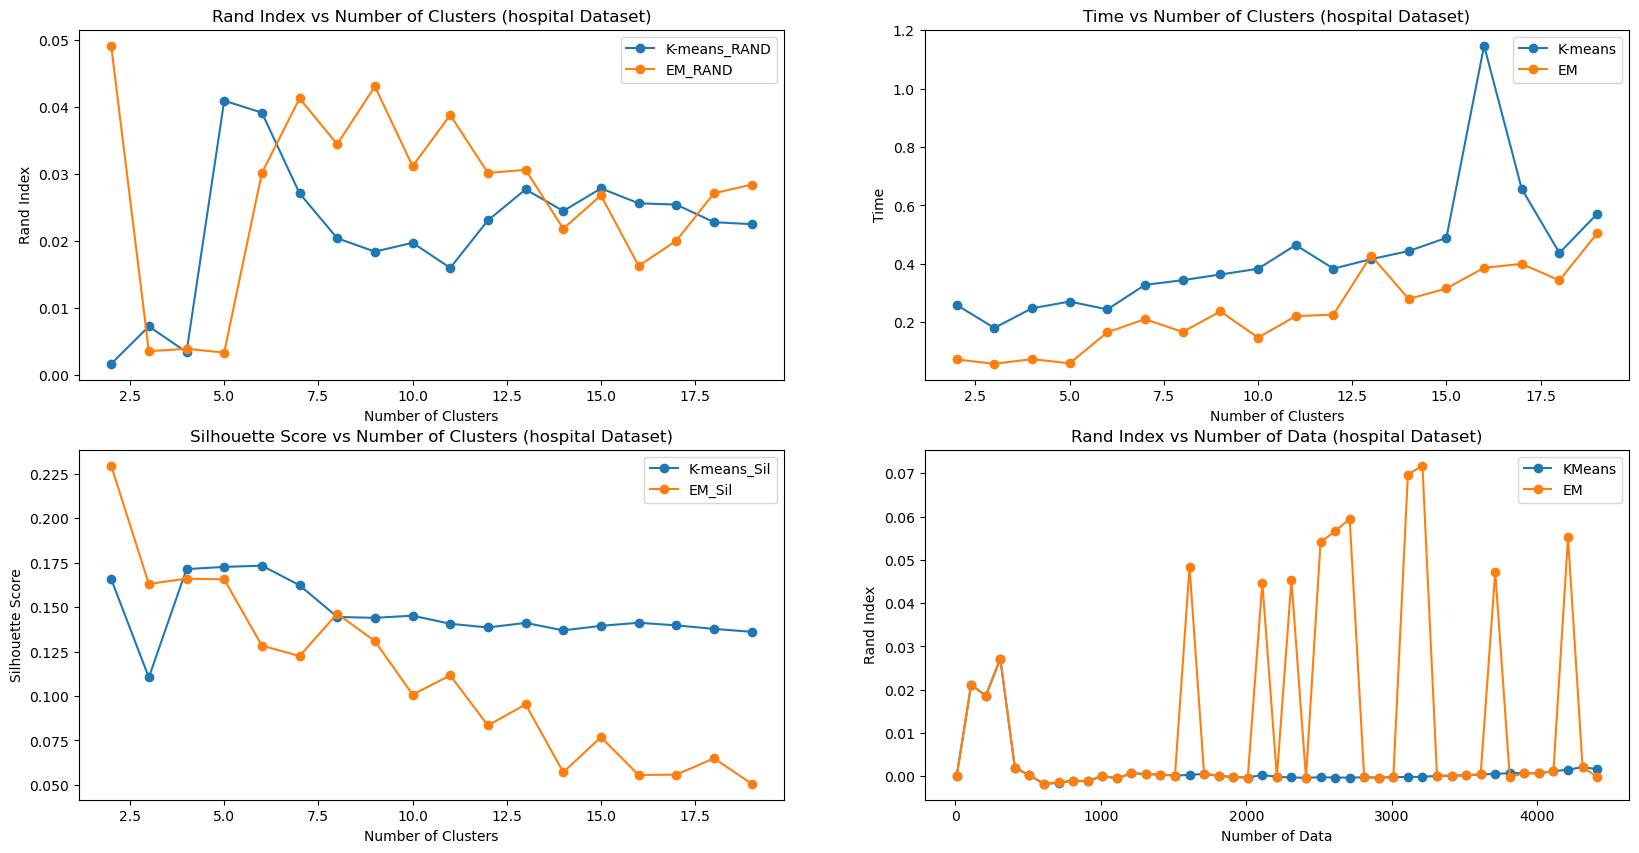

In [15]:
hospital_performance(X_hospital_ica, y_hospital)


/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will chang

rand_index_km_hospital 0.07711490007947887
rand_index_em_hospital 0.04929756607966538


/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will chang

/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will chang

array([[<Axes: title={'center': 'Rand Index vs Number of Clusters (hospital Dataset)'}, xlabel='Number of Clusters', ylabel='Rand Index'>,
        <Axes: title={'center': 'Time vs Number of Clusters (hospital Dataset)'}, xlabel='Number of Clusters', ylabel='Time'>],
       [<Axes: title={'center': 'Silhouette Score vs Number of Clusters (hospital Dataset)'}, xlabel='Number of Clusters', ylabel='Silhouette Score'>,
        <Axes: title={'center': 'Rand Index vs Number of Data (hospital Dataset)'}, xlabel='Number of Data', ylabel='Rand Index'>]],
      dtype=object)

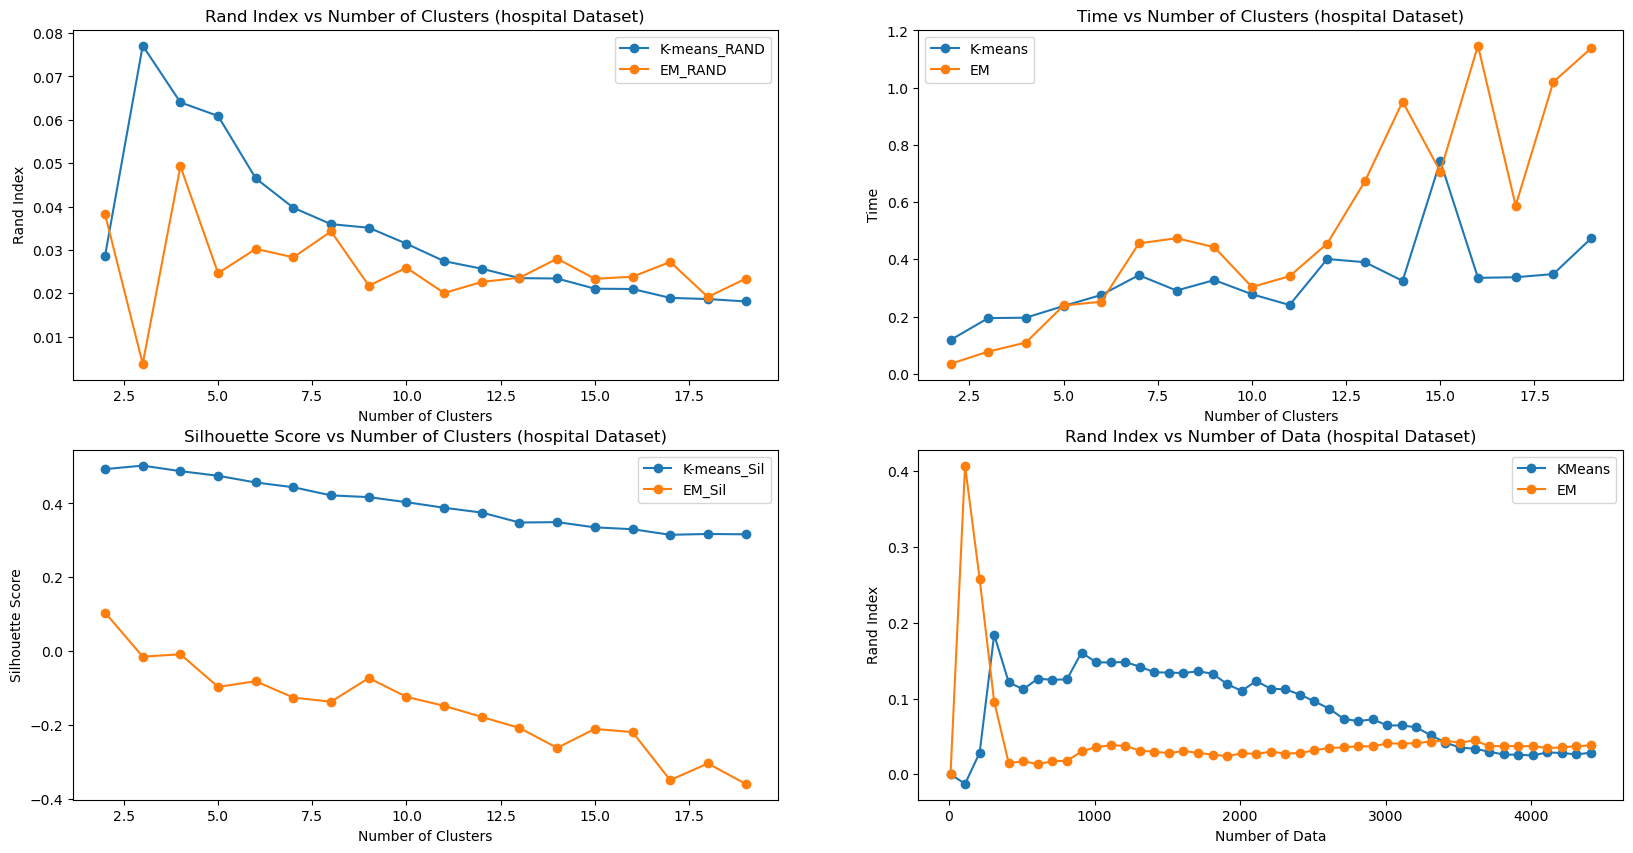

In [16]:
hospital_performance(X_hospital_rp, y_hospital)

pca 0.9666666666666668
ica 0.9666666666666668
rp 0.9666666666666666
raw 0.9800000000000001


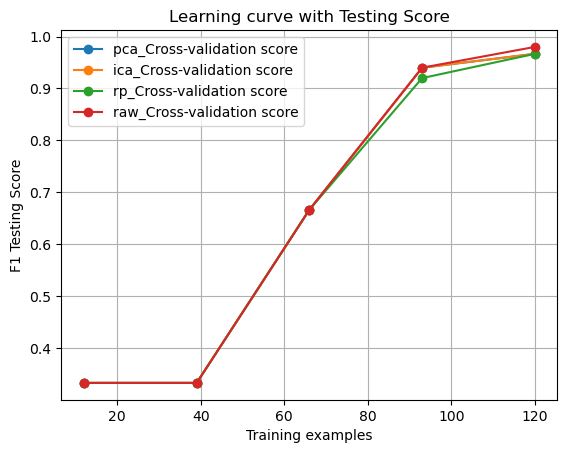

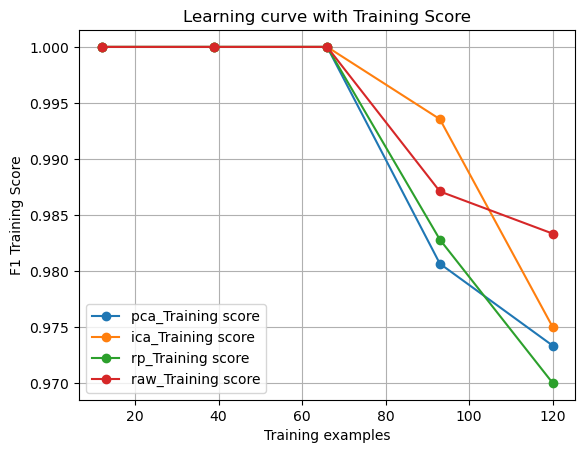

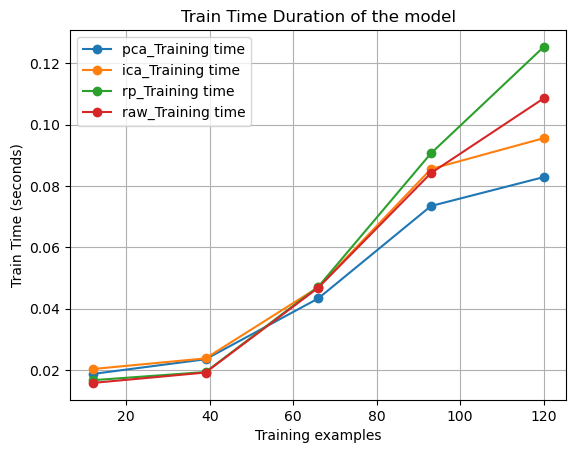

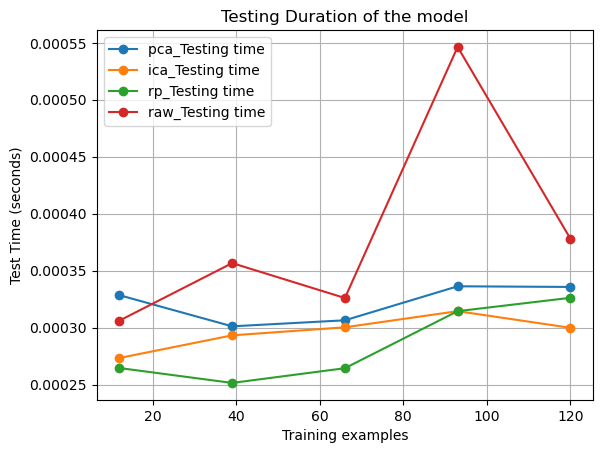

In [17]:


# Define the number of components based on previous evaluations
n_components_pca = 2  # Example: from PCA explained variance plot
n_components_ica = 2  # Example: from ICA kurtosis plot
n_components_rp = 2   # Example: from RP reconstruction error plot

# Apply PCA
pca = PCA(n_components=n_components_pca)
X_iris_pca = pca.fit_transform(X_iris)

# Apply ICA
ica = FastICA(n_components=n_components_ica, random_state=42)
X_iris_ica = ica.fit_transform(X_iris)

# Apply RP
rp = GaussianRandomProjection(n_components=n_components_rp, random_state=42)
X_iris_rp = rp.fit_transform(X_iris)

train_score_results = {
    'pca': [],
    'ica': [],
    'rp': [],
    'raw': []
}

train_score_std_results = {
    'pca': [],
    'ica': [],
    'rp': [],
    'raw': []
}

test_score_results = {
    'pca': [],
    'ica': [],
    'rp': [],
    'raw': []
}

test_score_std_results = {
    'pca': [],
    'ica': [],
    'rp': [],
    'raw': []
}
train_sizes_results = {
    'pca': [],
    'ica': [],
    'rp': [],
    'raw': []
}

fit_time_results = {
    'pca': [],
    'ica': [],
    'rp': [],
    'raw': []
}

score_times_results = {
    'pca': [],
    'ica': [],
    'rp': [],
    'raw': []
}

# Function to plot learning curve
def plot_learning_curve(estimator, X, y, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5), algo=''):
    
    train_sizes, train_scores, test_scores, fit_times, score_times = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, return_times=True
    )
    
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    
    fit_time_results[algo] = np.mean(fit_times, axis=1)
    score_times_results[algo] = np.mean(score_times, axis=1)
    train_score_results[algo] = train_scores_mean
    test_score_results[algo] = test_scores_mean
    train_sizes_results[algo] = train_sizes

    return 

estimator = MLPClassifier(random_state=42, max_iter=1000)

plot_learning_curve(estimator, X_iris_pca, y_iris, cv=5, n_jobs=3, algo='pca')
plot_learning_curve(estimator, X_iris, y_iris, cv=5, n_jobs=3, algo='raw')

plot_learning_curve(estimator, X_iris_ica, y_iris, cv=5, n_jobs=3, algo='ica')

plot_learning_curve(estimator, X_iris_rp, y_iris, cv=5, n_jobs=3, algo='rp')


plt.figure()
# Plot learning curve
plt.grid()
plt.xlabel("Training examples")
plt.ylabel("F1 Testing Score")
plt.title('Learning Curves')
for algo in train_score_results:
    train_sizes = train_sizes_results[algo]
    plt.plot(train_sizes, test_score_results[algo], 'o-', label=algo+"_Cross-validation score")
    print(algo, test_score_results[algo][-1])
plt.title('Learning curve with Testing Score')
plt.legend(loc="best")
plt.show()
# Plot fit times

plt.figure()
# Plot learning curve
plt.grid()
plt.xlabel("Training examples")
plt.ylabel("F1 Training Score")
plt.title('Learning Curves')
for algo in train_score_results:
    train_sizes = train_sizes_results[algo]
    plt.plot(train_sizes, train_score_results[algo], 'o-', label=algo+"_Training score")
    
plt.title('Learning curve with Training Score')
plt.legend(loc="best")
plt.show()
# Plot fit times

plt.figure()
plt.grid()


for algo in train_score_results:
    train_sizes = train_sizes_results[algo]
    plt.plot(train_sizes, fit_time_results[algo], 'o-', label=algo+"_Training time")
plt.xlabel("Training examples")
plt.ylabel("Train Time (seconds)")
plt.title("Train Time Duration of the model")
plt.legend(loc="best")

plt.show()
plt.figure()
plt.grid()
for algo in train_score_results:
    train_sizes = train_sizes_results[algo]
    plt.plot(train_sizes, score_times_results[algo], 'o-', label=algo+"_Testing time")
plt.xlabel("Training examples")
plt.ylabel("Test Time (seconds)")
plt.title("Testing Duration of the model")
plt.legend(loc="best")

plt.show()


A5 

/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/henleyz/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.

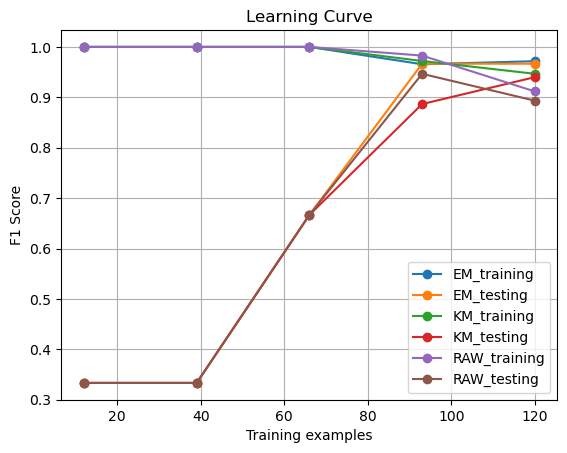

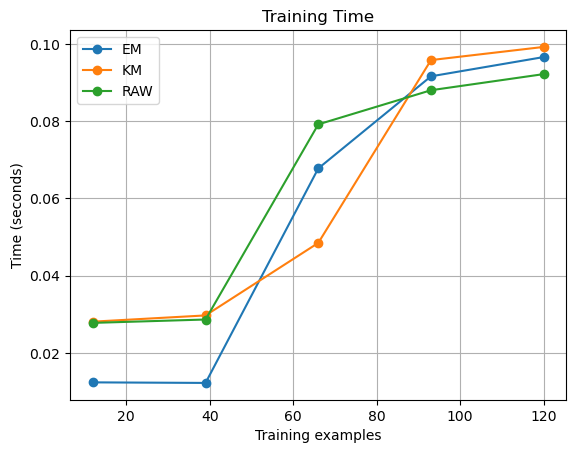

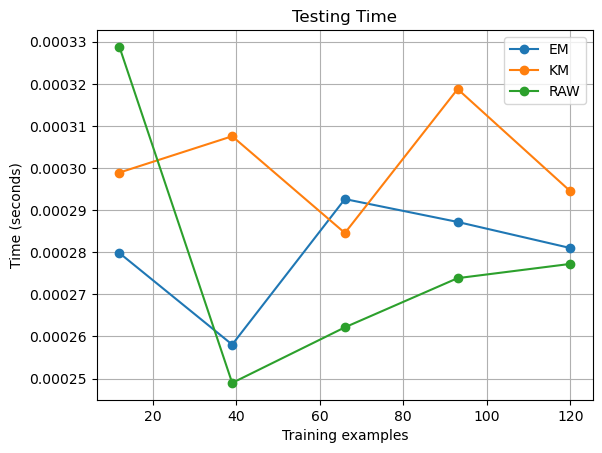

In [18]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_iris)
X_kmeans = kmeans.transform(X_iris)  # Transform original data based on cluster centers

# Apply Expectation-Maximization (EM) clustering (Gaussian Mixture Model)
em = GaussianMixture(n_components=3, random_state=42)
em.fit(X_iris)
X_em = em.predict_proba(X_iris)  # Get probabilities of belonging to each cluster

# Concatenate new features from K-means and EM clustering to original features
X_new_km = np.concatenate((X_iris, X_kmeans), axis=1)
X_new_em = np.concatenate((X_iris, X_em), axis=1)

train_score_results = {
}
test_score_results = {
    
}
train_time_results = {}
test_time_results = {}
# Function to plot learning curve and time duration curve
def plot_learning_and_time_curves(estimator, X, y, axes=None, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5), algo=""):

    
    train_sizes, train_scores, test_scores, fit_times, score_times = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, return_times=True
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    train_score_results[algo] = train_scores_mean
    test_score_results[algo] = test_scores_mean
    train_time_results[algo] = np.mean(fit_times, axis=1)
    test_time_results[algo] = np.mean(score_times, axis=1)
#     print('train_scores_mean: ', train_scores_mean[-1])
#     print('test_scores_mean: ', test_scores_mean[-1])
#     print('fit_times', np.mean(fit_times, axis=1)[-1])
#     print('score_times', np.mean(score_times, axis=1)[-1])
    # Plot learning curve
    

   

    return fig, axes

# Initialize MLPClassifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(5,), max_iter=1000, random_state=42)

plot_learning_and_time_curves(mlp_classifier, 
                              X_new_km, y_iris, axes=axes, cv=5, n_jobs=4, algo='KM')
# Initialize MLPClassifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(5,), max_iter=1000, random_state=42)
plot_learning_and_time_curves(mlp_classifier, 
                              X_iris, y_iris, axes=axes, cv=5, n_jobs=4, algo='RAW')
# Initialize MLPClassifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(5,), max_iter=1000, random_state=42)

plot_learning_and_time_curves(mlp_classifier, 
                              X_new_em, y_iris, axes=axes, cv=5, n_jobs=4, algo='EM')

plt.figure()

plt.title('Learning Curve')

plt.xlabel("Training examples")
plt.ylabel("F1 Score")
plt.grid()
for algo in ['EM', 'KM','RAW']:
    plt.plot(train_sizes, train_score_results[algo], 'o-', label=algo + '_training')
    plt.plot(train_sizes, test_score_results[algo], 'o-', label=algo + '_testing')
plt.legend(loc="best")
    
plt.show()



plt.figure()

plt.grid()
for algo in ['EM', 'KM', 'RAW']:
    plt.plot(train_sizes, train_time_results[algo], 'o-', label=algo)
plt.xlabel("Training examples")
plt.ylabel("Time (seconds)")
plt.title("Training Time")
plt.legend(loc="best")
plt.show()

plt.grid()
for algo in ['EM', 'KM', 'RAW']:
    plt.plot(train_sizes, test_time_results[algo], 'o-', label=algo)
plt.xlabel("Training examples")
plt.ylabel("Time (seconds)")
plt.title("Testing Time")
plt.legend(loc="best")
plt.show()
